# AI Multi-label Image Classification

## 1. Data Preprocessing

In [1]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical

In [3]:
# Importing the dataset
df = pd.read_csv('Downloads/Crave_multi-label_classification/Tags.csv', delimiter=';')
df.shape
df

,Picture,Support_1,Support_2,Support_3,Support_4,Support_5,Support_6,Location,Food,Dessert,...,Middle-eastern,Mexican,Asian,Spanish,Western,Philippine,European,Indonesian,Mediterranean,Others.1
0,R1_1_MY,R1,1,0,1,1,1,"Oversea, 84-88, Jalan Imbi, Bukit Bintang, 551...",1,0,...,0,0,0,0,0,0,0,0,0,0
1,R1_2_MY,R1,1,0,2,1,2,"Oversea, 84-88, Jalan Imbi, Bukit Bintang, 551...",1,0,...,0,0,0,0,0,0,0,0,0,0
2,R1_3_MY,R1,1,0,3,1,3,"Oversea, 84-88, Jalan Imbi, Bukit Bintang, 551...",1,0,...,0,0,0,0,0,0,0,0,0,0
3,R1_4_MY,R1,1,1,3,0,4,"Oversea, 84-88, Jalan Imbi, Bukit Bintang, 551...",1,0,...,0,0,0,0,0,0,0,0,0,0
4,R2_1_MY,R2,2,2,3,0,1,"128 Thai, 42, Jalan SS 15/4c, Ss 15, 47500 Sub...",1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13609,R1016_5_SPN,R1016,1016,1015,3,1,5,"Sibuya Urban Sushi Bar Córdoba, Avenida del Gr...",1,0,...,0,0,0,0,0,0,0,0,0,0
13610,R1016_6_SPN,R1016,1016,1016,3,0,6,"Sibuya Urban Sushi Bar Córdoba, Avenida del Gr...",1,0,...,0,0,0,0,0,0,0,0,0,0
13611,R1017_1_SPN,R1017,1017,1017,3,0,1,"Pasillo Oriental, Calle de Velazquez Bosco 6, ...",1,0,...,1,0,0,0,0,0,0,0,0,0
13612,R1018_1_SPN,R1018,1018,1018,3,0,1,"Restaurante Bambú, Calle del Doctor Manuel Rui...",1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13614 entries, 0 to 13613
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Picture         13614 non-null  object
 1   Support_1       13614 non-null  object
 2   Support_2       13614 non-null  int64 
 3   Support_3       13614 non-null  int64 
 4   Support_4       13614 non-null  int64 
 5   Support_5       13614 non-null  int64 
 6   Support_6       13614 non-null  int64 
 7   Location        13614 non-null  object
 8   Food            13614 non-null  int64 
 9   Dessert         13614 non-null  int64 
 10  Drink           13614 non-null  int64 
 11  Pastries        13614 non-null  int64 
 12  Savory          13614 non-null  int64 
 13  Sweet           13614 non-null  int64 
 14  Sour            13614 non-null  int64 
 15  Spicy           13614 non-null  int64 
 16  Salty           13614 non-null  int64 
 17  Bitter          13614 non-null  int64 
 18  Seafoo

In [5]:
# Converting the images size and creating an X variable
img_width = 32 # Change this to 224 once the oversampling issues has resolved
img_height = 32 # Same goes to this one

X = []

for i in tqdm(range(df.shape[0])):
  path = 'Downloads/Crave_multi-label_classification/Pictures/' + df['Picture'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 13614/13614 [01:05<00:00, 208.04it/s]


In [6]:
X.shape

(13614, 32, 32, 3)

In [7]:
df.shape

(13614, 46)

In [8]:
# Removing the irrelevant columns from the dataset
df = df.drop(['Picture', 'Support_1', 'Support_2', 'Support_3', 'Support_4', 'Support_5', 'Support_6', 'Location', 'Cuisines'], axis = 1)

In [9]:
df

,Food,Dessert,Drink,Pastries,Savory,Sweet,Sour,Spicy,Salty,Bitter,...,Middle-eastern,Mexican,Asian,Spanish,Western,Philippine,European,Indonesian,Mediterranean,Others.1
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13609,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13610,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13611,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13612,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Distribution

In [10]:
# Define the number of rows and columns for subplots
num_rows = 7
num_cols = 6

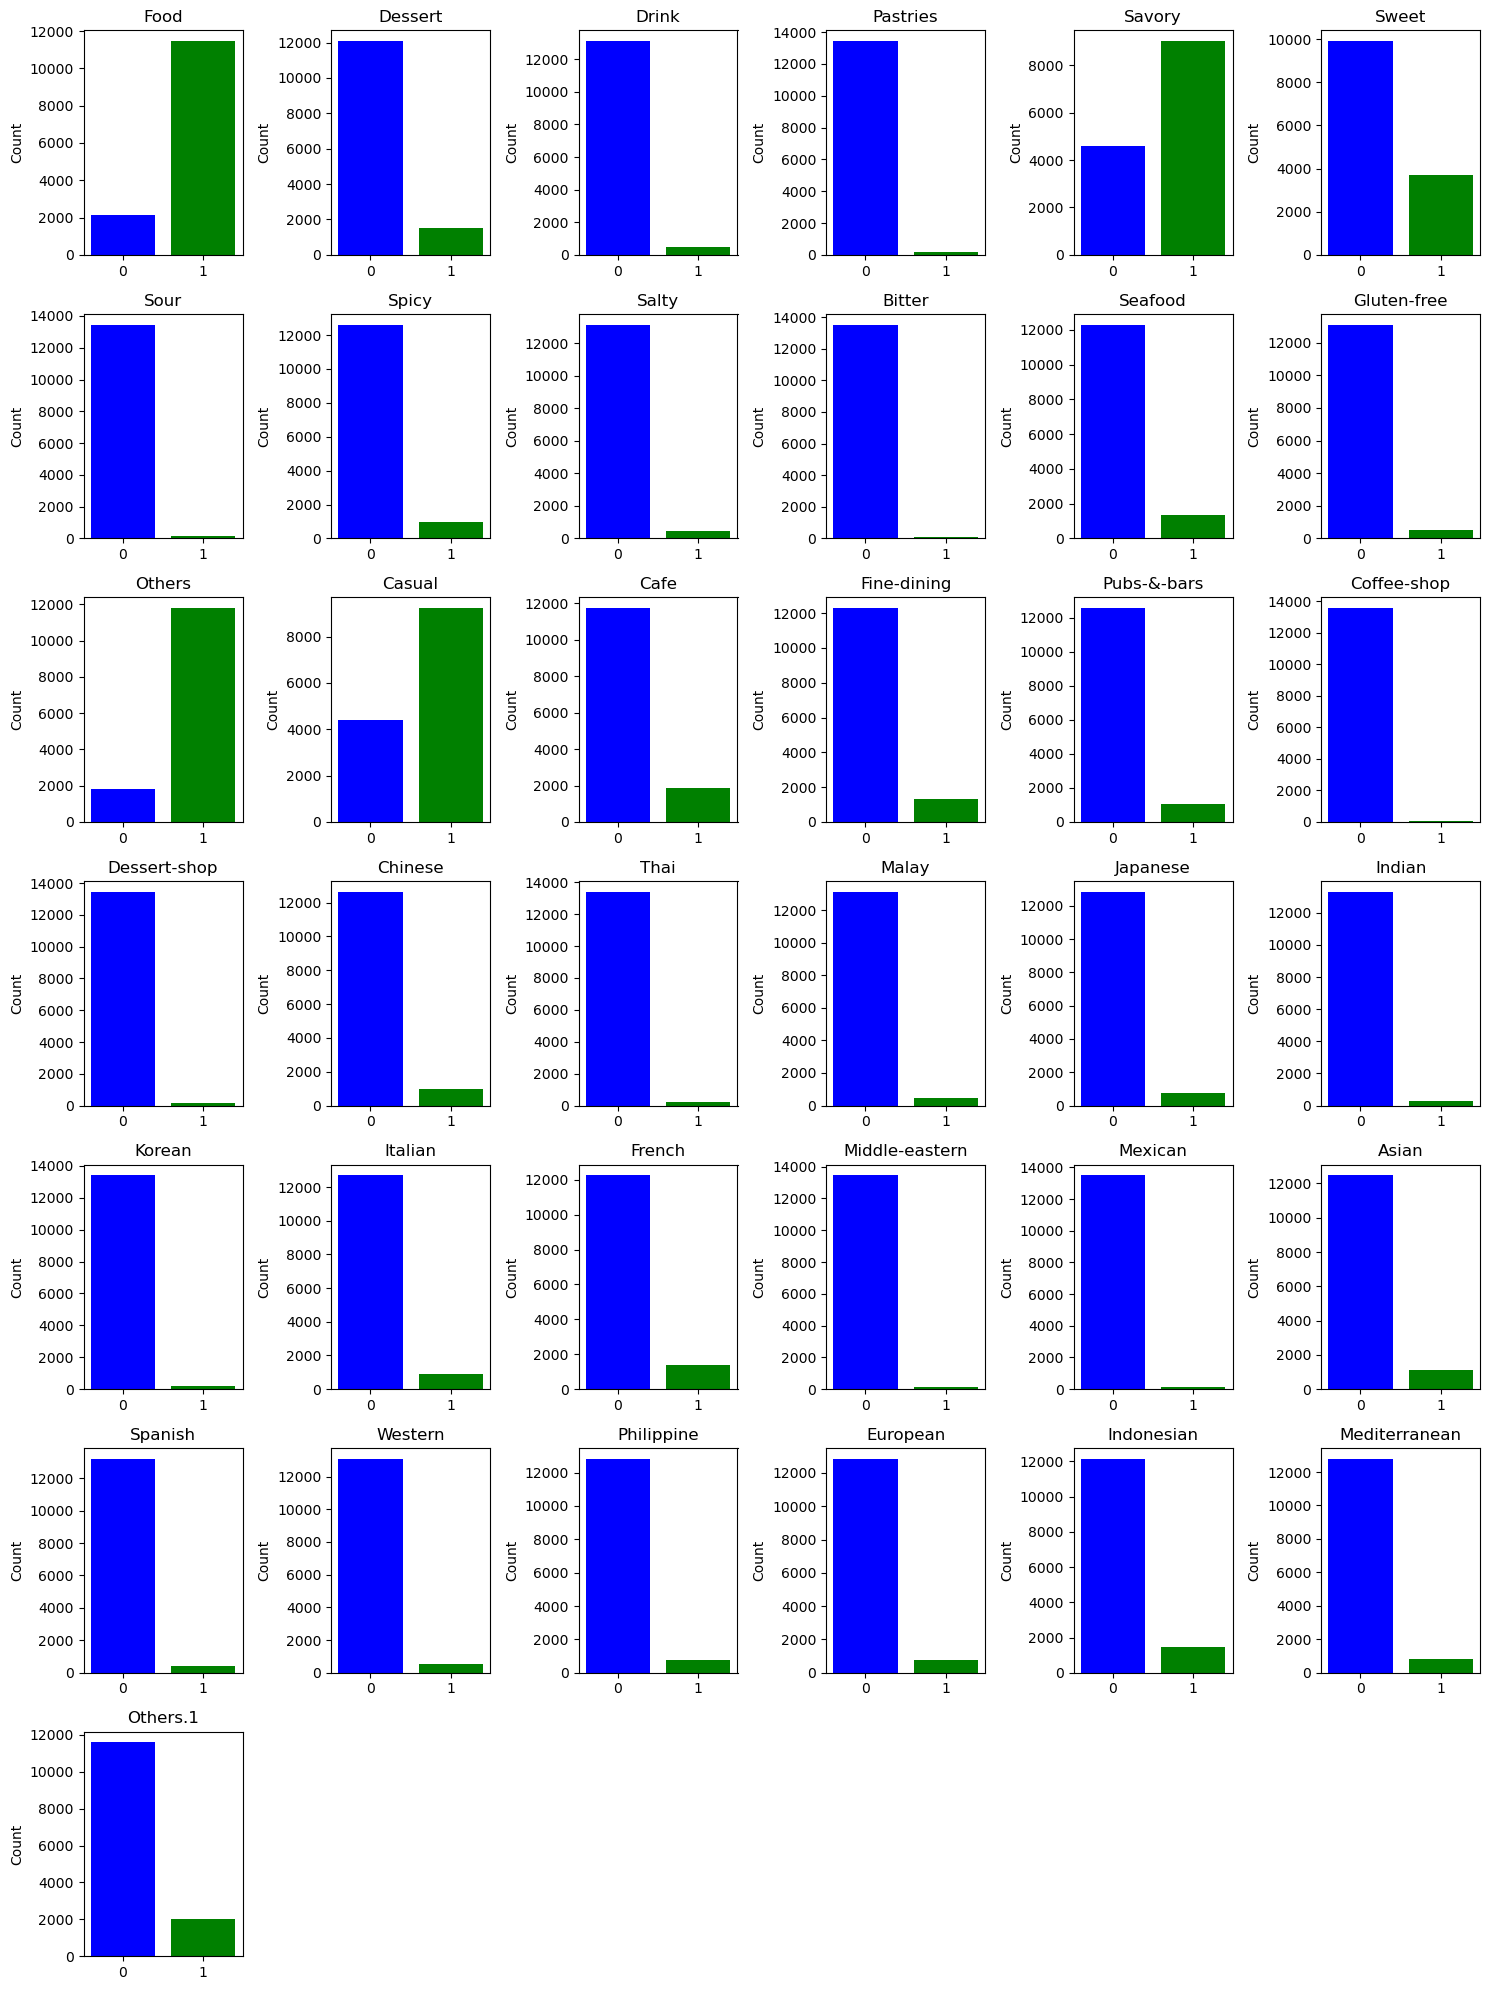

In [11]:
# Calculate the total number of plots
total_plots = len(df.columns)

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axis objects to simplify indexing
axes = axes.flatten()

# Loop through each column and plot the data distribution
for i, col in enumerate(df.columns):
    # Calculate the number of ones and zeros in the column
    ones_count = df[col].sum()
    zeros_count = len(df) - ones_count

    # Create a bar plot for the data distribution
    axes[i].bar(['0', '1'], [zeros_count, ones_count], color=['blue', 'green'])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Count')

# Remove any empty subplots (if the number of columns is not a multiple of num_rows*num_cols)
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Data oversampling

In [10]:
# Renaming the last column from "Others.1" to "Others"
columns_list = df.columns.tolist()

new_others = 'Others'
columns_list[-1] = new_others

# Update the DataFrame with the new column name
df.columns = columns_list

In [11]:
df

,Food,Dessert,Drink,Pastries,Savory,Sweet,Sour,Spicy,Salty,Bitter,...,Middle-eastern,Mexican,Asian,Spanish,Western,Philippine,European,Indonesian,Mediterranean,Others
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13609,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13610,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13611,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13612,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
category_labels = df[['Food','Dessert','Drink','Pastries']].values
taste_labels = df[['Savory','Sweet','Sour','Spicy','Salty','Bitter']].values
type_labels = df[['Seafood','Gluten-free', 'Others']].values
ambiance_labels = df[['Casual','Cafe','Fine-dining','Pubs-&-bars','Coffee-shop','Dessert-shop']].values
cuisine_labels = df[['Chinese','Thai','Malay','Japanese','Indian','Korean','Italian','French','Middle-eastern','Mexican','Asian','Spanish','Western','Philippine','European','Indonesian','Mediterranean','Others']].values

In [13]:
# Reshape X to a 2D array (num_samples, num_features)
num_samples, image_height, image_width, num_channels = X.shape
X_flat = X.reshape(num_samples, -1)

In [14]:
# Instantiate the RandomOverSampler for multi-class classification
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [15]:
# Splitting the training and validation dataset
#X_train, X_val, category_train, category_val, taste_train, taste_val, type_train, type_val, ambiance_train, ambiance_val, cuisine_train, cuisine_val = train_test_split(
#X, category_data, taste_data, type_data, ambiance_data, cuisine_data, test_size=0.2, random_state=42)

In [16]:
# Split the data into training and testing sets
#X_train, X_test, category_train, category_test, taste_train, taste_test, type_train, type_test, ambiance_train, ambiance_test, cuisine_train, cuisine_test = train_test_split(X, category_data, taste_data, type_data, ambiance_data, cuisine_data, test_size=0.2, random_state=42)

#### Category data - Oversampling

In [41]:
# Fit and apply the RandomOverSampler for each label separately
X_resampled_list_1 = []
category_resampled_list = []

for i in range(category_labels.shape[1]):
    X_resampled_label_1, category_resampled_label = ros.fit_resample(X_flat, category_labels[:, i])
    X_resampled_list_1.append(X_resampled_label_1)
    category_resampled_list.append(category_resampled_label)

In [45]:
# Reshape X_resampled back to 4D (num_samples, image_height, image_width, num_channels)
X_resampled_list_1 = [X_label_1.reshape(-1, image_height, image_width, num_channels) for X_label_1 in X_resampled_list_1]

In [46]:
# Data distribution before and after oversampling for each label
class_counts_before = category_labels.sum(axis=0)
class_counts_after = [category_resampled_label.sum() for category_resampled_label in category_resampled_list]

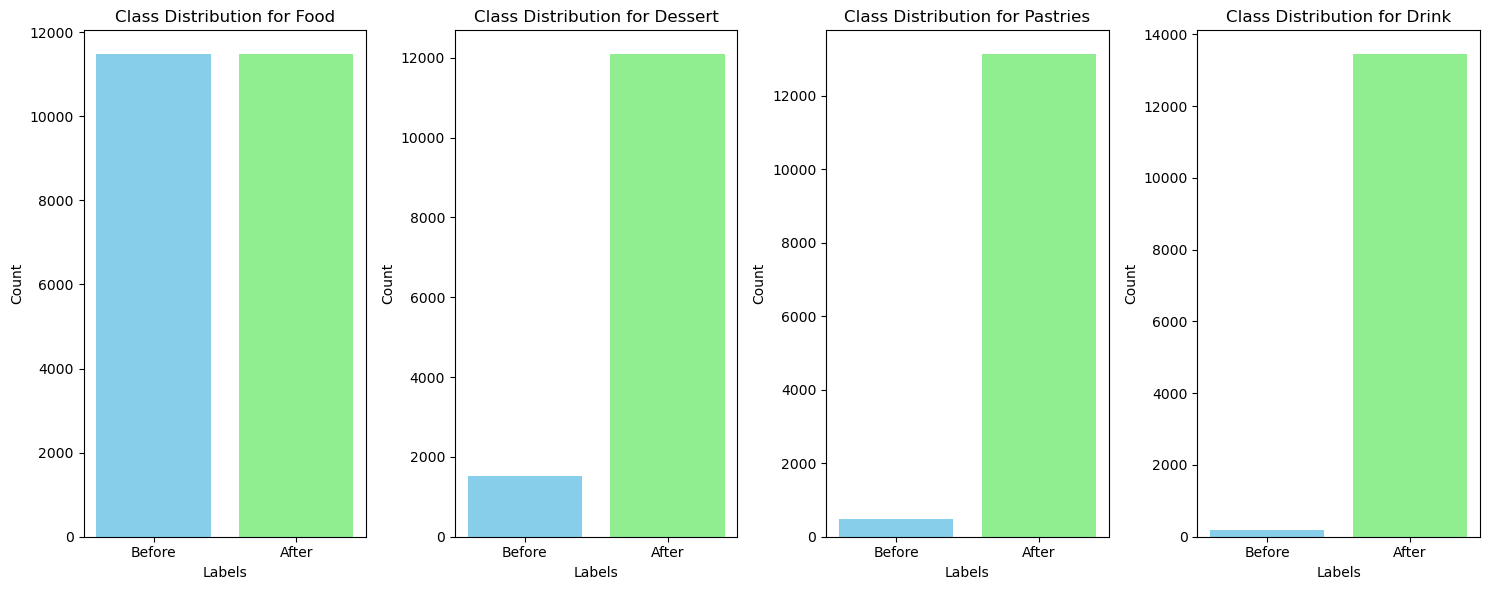

In [47]:
# Plotting the class distribution before and after oversampling for each label
category_names = ['Food', 'Dessert', 'Pastries', 'Drink']

plt.figure(figsize=(15, 6))
num_labels = len(category_names)

for i in range(num_labels):
    plt.subplot(1, num_labels, i+1)
    plt.bar(['Before', 'After'], [class_counts_before[i], class_counts_after[i]], color=['skyblue', 'lightgreen'])
    plt.title(f'Class Distribution for {category_names[i]}')
    plt.xlabel('Labels')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Taste data - Oversampling

In [17]:
# Reshape X to a 2D array (num_samples, num_features)
#num_samples, image_height, image_width, num_channels = X.shape
#X_flat = X.reshape(num_samples, -1)

In [18]:
# Fit and apply the RandomOverSampler for each label separately
X_resampled_list_2 = []
taste_resampled_list = []

for i in range(taste_labels.shape[1]):
    X_resampled_label_2, taste_resampled_label = ros.fit_resample(X_flat, taste_labels[:, i])
    X_resampled_list_2.append(X_resampled_label_2)
    taste_resampled_list.append(taste_resampled_label)

In [19]:
# Reshape X_resampled back to 4D (num_samples, image_height, image_width, num_channels)
X_resampled_list_2 = [X_label_2.reshape(-1, image_height, image_width, num_channels) for X_label_2 in X_resampled_list_2]

In [20]:
# Data distribution before and after oversampling for each label
class_counts_before = taste_labels.sum(axis=0)
class_counts_after = [taste_resampled_label.sum() for taste_resampled_label in taste_resampled_list]

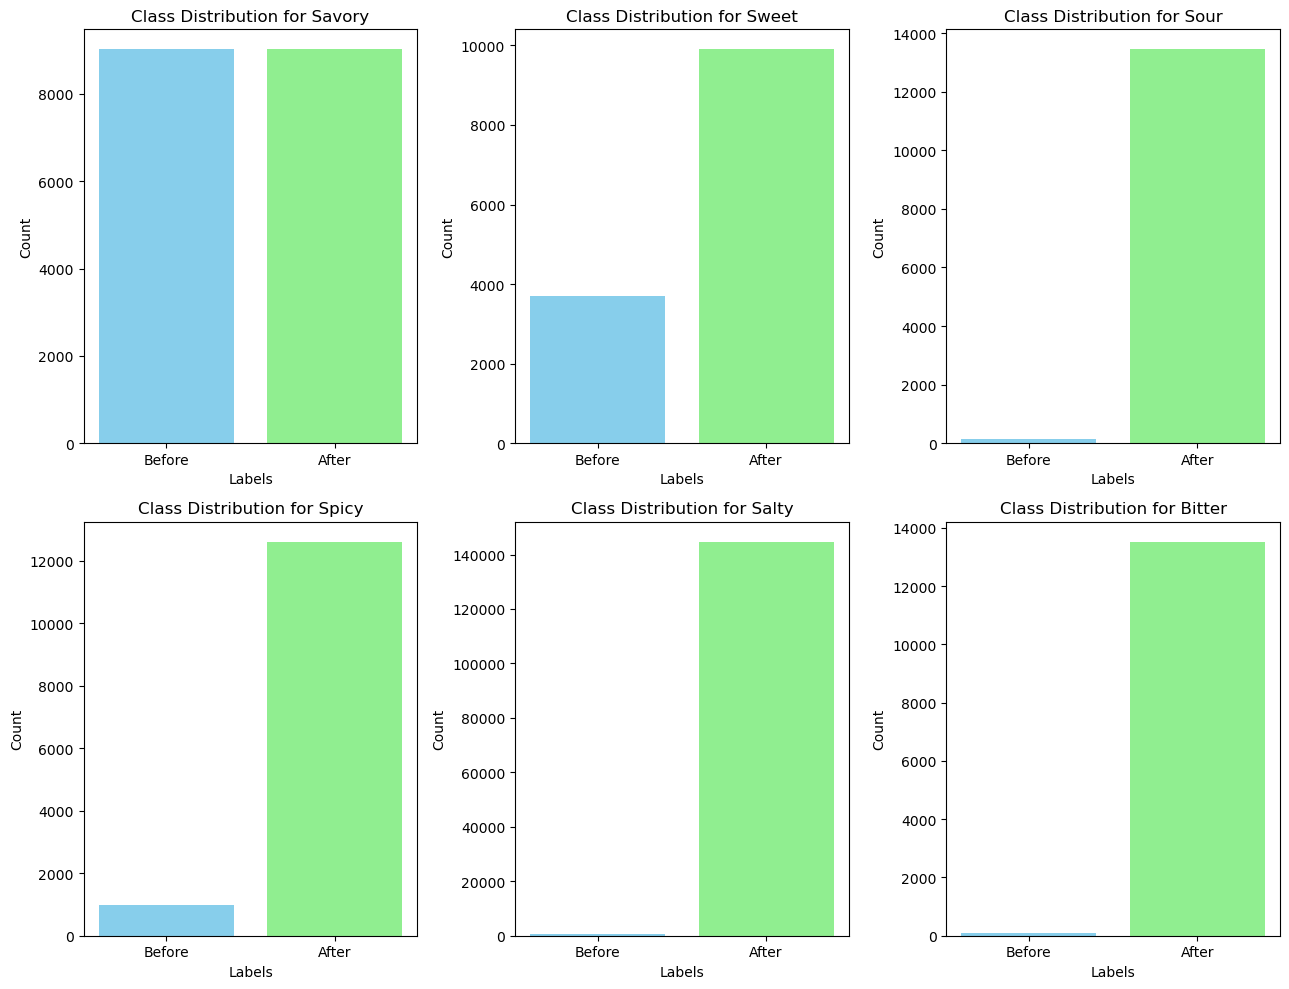

In [21]:
# Plotting the class distribution before and after oversampling for each label
taste_names = ['Savory','Sweet','Sour','Spicy','Salty','Bitter']

plt.figure(figsize=(13, 10))
num_labels = len(taste_names)

for i in range(num_labels):
    plt.subplot(2, 3, i+1)
    plt.bar(['Before', 'After'], [class_counts_before[i], class_counts_after[i]], color=['skyblue', 'lightgreen'])
    plt.title(f'Class Distribution for {taste_names[i]}')
    plt.xlabel('Labels')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Type data - Oversampling

In [15]:
# Reshape X to a 2D array (num_samples, num_features)
#num_samples, image_height, image_width, num_channels = X.shape
#X_flat = X.reshape(num_samples, -1)

In [16]:
# Fit and apply the RandomOverSampler for each label separately
X_resampled_list_3 = []
type_resampled_list = []

for i in range(type_labels.shape[1]):
    X_resampled_label_3, type_resampled_label = ros.fit_resample(X_flat, type_labels[:, i])
    X_resampled_list_3.append(X_resampled_label_3)
    type_resampled_list.append(type_resampled_label)

In [17]:
# Reshape X_resampled back to 4D (num_samples, image_height, image_width, num_channels)
X_resampled_list_3 = [X_label_3.reshape(-1, image_height, image_width, num_channels) for X_label_3 in X_resampled_list_3]

In [18]:
# Data distribution before and after oversampling for each label
class_counts_before = type_labels.sum(axis=0)
class_counts_after = [type_resampled_label.sum() for type_resampled_label in type_resampled_list]

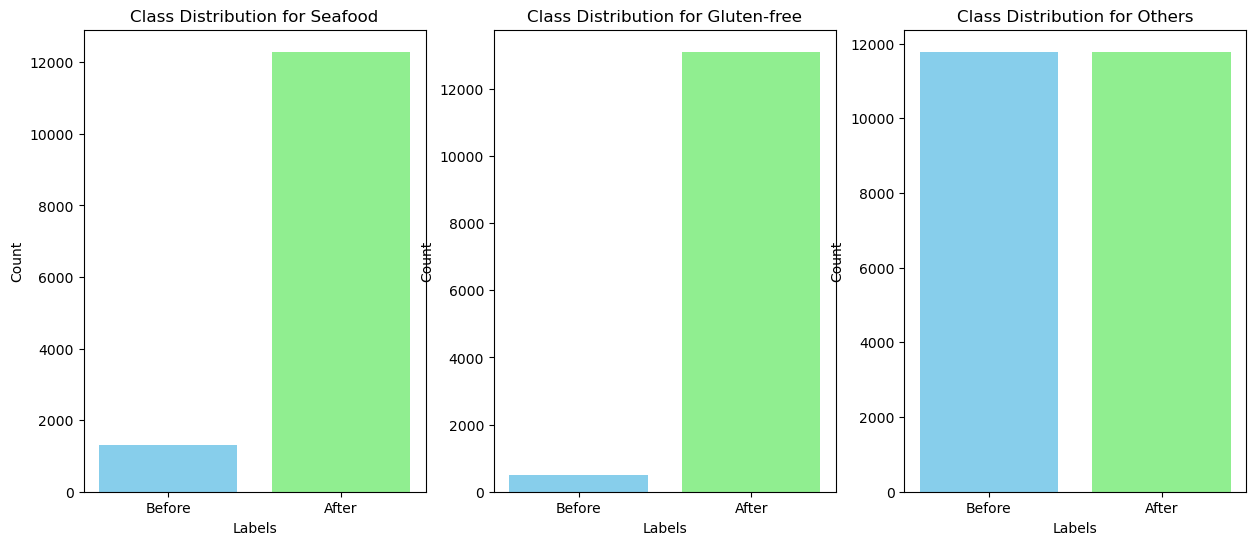

In [19]:
# Plotting the class distribution before and after oversampling for each label
type_names = ['Seafood','Gluten-free', 'Others']

plt.figure(figsize=(15, 6))
num_labels = len(type_names)

for i in range(num_labels):
    plt.subplot(1, num_labels, i+1)
    plt.bar(['Before', 'After'], [class_counts_before[i], class_counts_after[i]], color=['skyblue', 'lightgreen'])
    plt.title(f'Class Distribution for {type_names[i]}')
    plt.xlabel('Labels')
    plt.ylabel('Count')

#plt.tight_layout()
plt.show()

#### Ambiance data - Oversampling

In [15]:
# Reshape X to a 2D array (num_samples, num_features)
#num_samples, image_height, image_width, num_channels = X.shape
#X_flat = X.reshape(num_samples, -1)

In [34]:
# Fit and apply the RandomOverSampler for each label separately
X_resampled_list_4 = []
ambiance_resampled_list = []

for i in range(ambiance_labels.shape[1]):
    X_resampled_label_4, ambiance_resampled_label = ros.fit_resample(X_flat, ambiance_labels[:, i])
    X_resampled_list_4.append(X_resampled_label_4)
    ambiance_resampled_list.append(ambiance_resampled_label)

In [35]:
# Reshape X_resampled back to 4D (num_samples, image_height, image_width, num_channels)
X_resampled_list_4 = [X_label_4.reshape(-1, image_height, image_width, num_channels) for X_label_4 in X_resampled_list_4]

In [36]:
# Data distribution before and after oversampling for each label
class_counts_before = ambiance_labels.sum(axis=0)
class_counts_after = [ambiance_resampled_label.sum() for ambiance_resampled_label in ambiance_resampled_list]

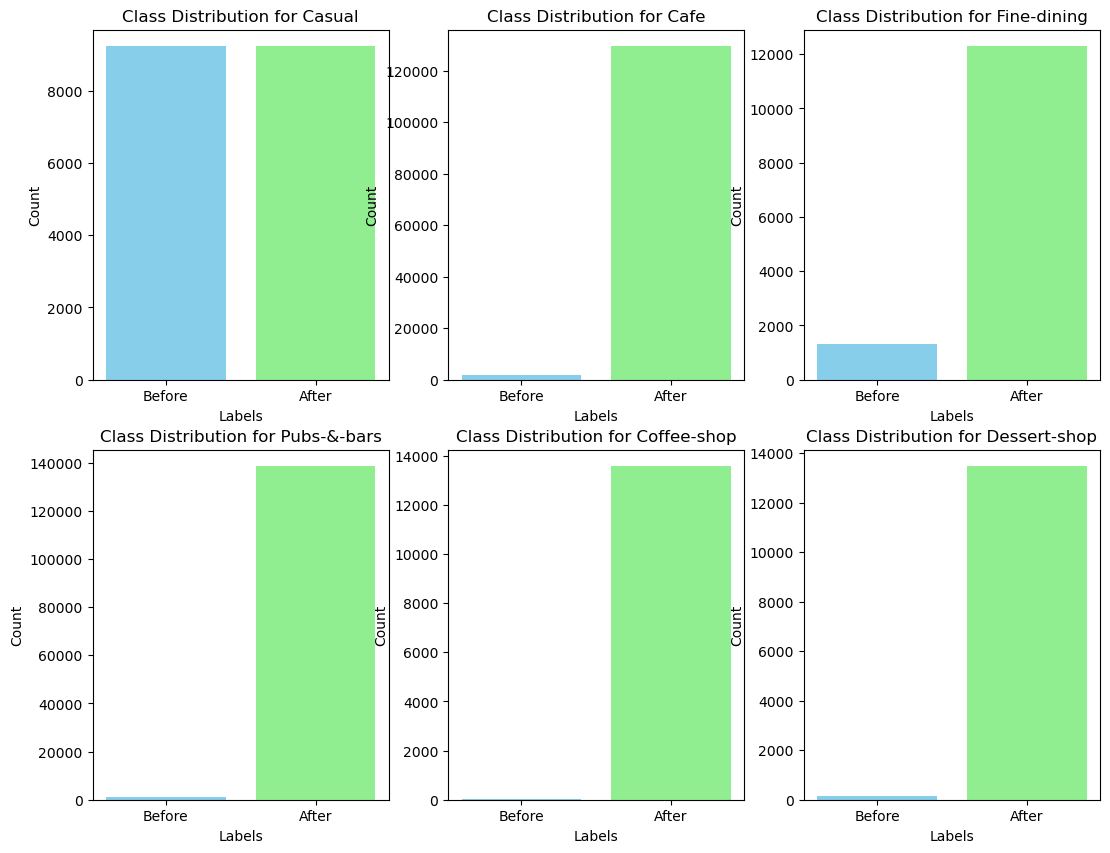

In [37]:
# Plotting the class distribution before and after oversampling for each label
ambiance_names = ['Casual','Cafe','Fine-dining','Pubs-&-bars','Coffee-shop','Dessert-shop']


plt.figure(figsize=(13, 10))
num_labels = len(ambiance_names)

for i in range(num_labels):
    plt.subplot(2, 3, i+1)
    plt.bar(['Before', 'After'], [class_counts_before[i], class_counts_after[i]], color=['skyblue', 'lightgreen'])
    plt.title(f'Class Distribution for {ambiance_names[i]}')
    plt.xlabel('Labels')
    plt.ylabel('Count')

#plt.tight_layout()
plt.show()

#### Cuisines data - Oversampling

In [15]:
# Reshape X to a 2D array (num_samples, num_features)
#num_samples, image_height, image_width, num_channels = X.shape
#X_flat = X.reshape(num_samples, -1)

In [16]:
# Fit and apply the RandomOverSampler for each label separately
X_resampled_list_5 = []
cuisine_resampled_list = []

for i in range(cuisine_labels.shape[1]):
    X_resampled_label_5, cuisine_resampled_label = ros.fit_resample(X_flat, cuisine_labels[:, i])
    X_resampled_list_5.append(X_resampled_label_5)
    cuisine_resampled_list.append(cuisine_resampled_label)

In [17]:
# Reshape X_resampled back to 4D (num_samples, image_height, image_width, num_channels)
X_resampled_list_5 = [X_label_5.reshape(-1, image_height, image_width, num_channels) for X_label_5 in X_resampled_list_5]

In [18]:
# Data distribution before and after oversampling for each label
class_counts_before = cuisine_labels.sum(axis=0)
class_counts_after = [cuisine_resampled_label.sum() for cuisine_resampled_label in cuisine_resampled_list]

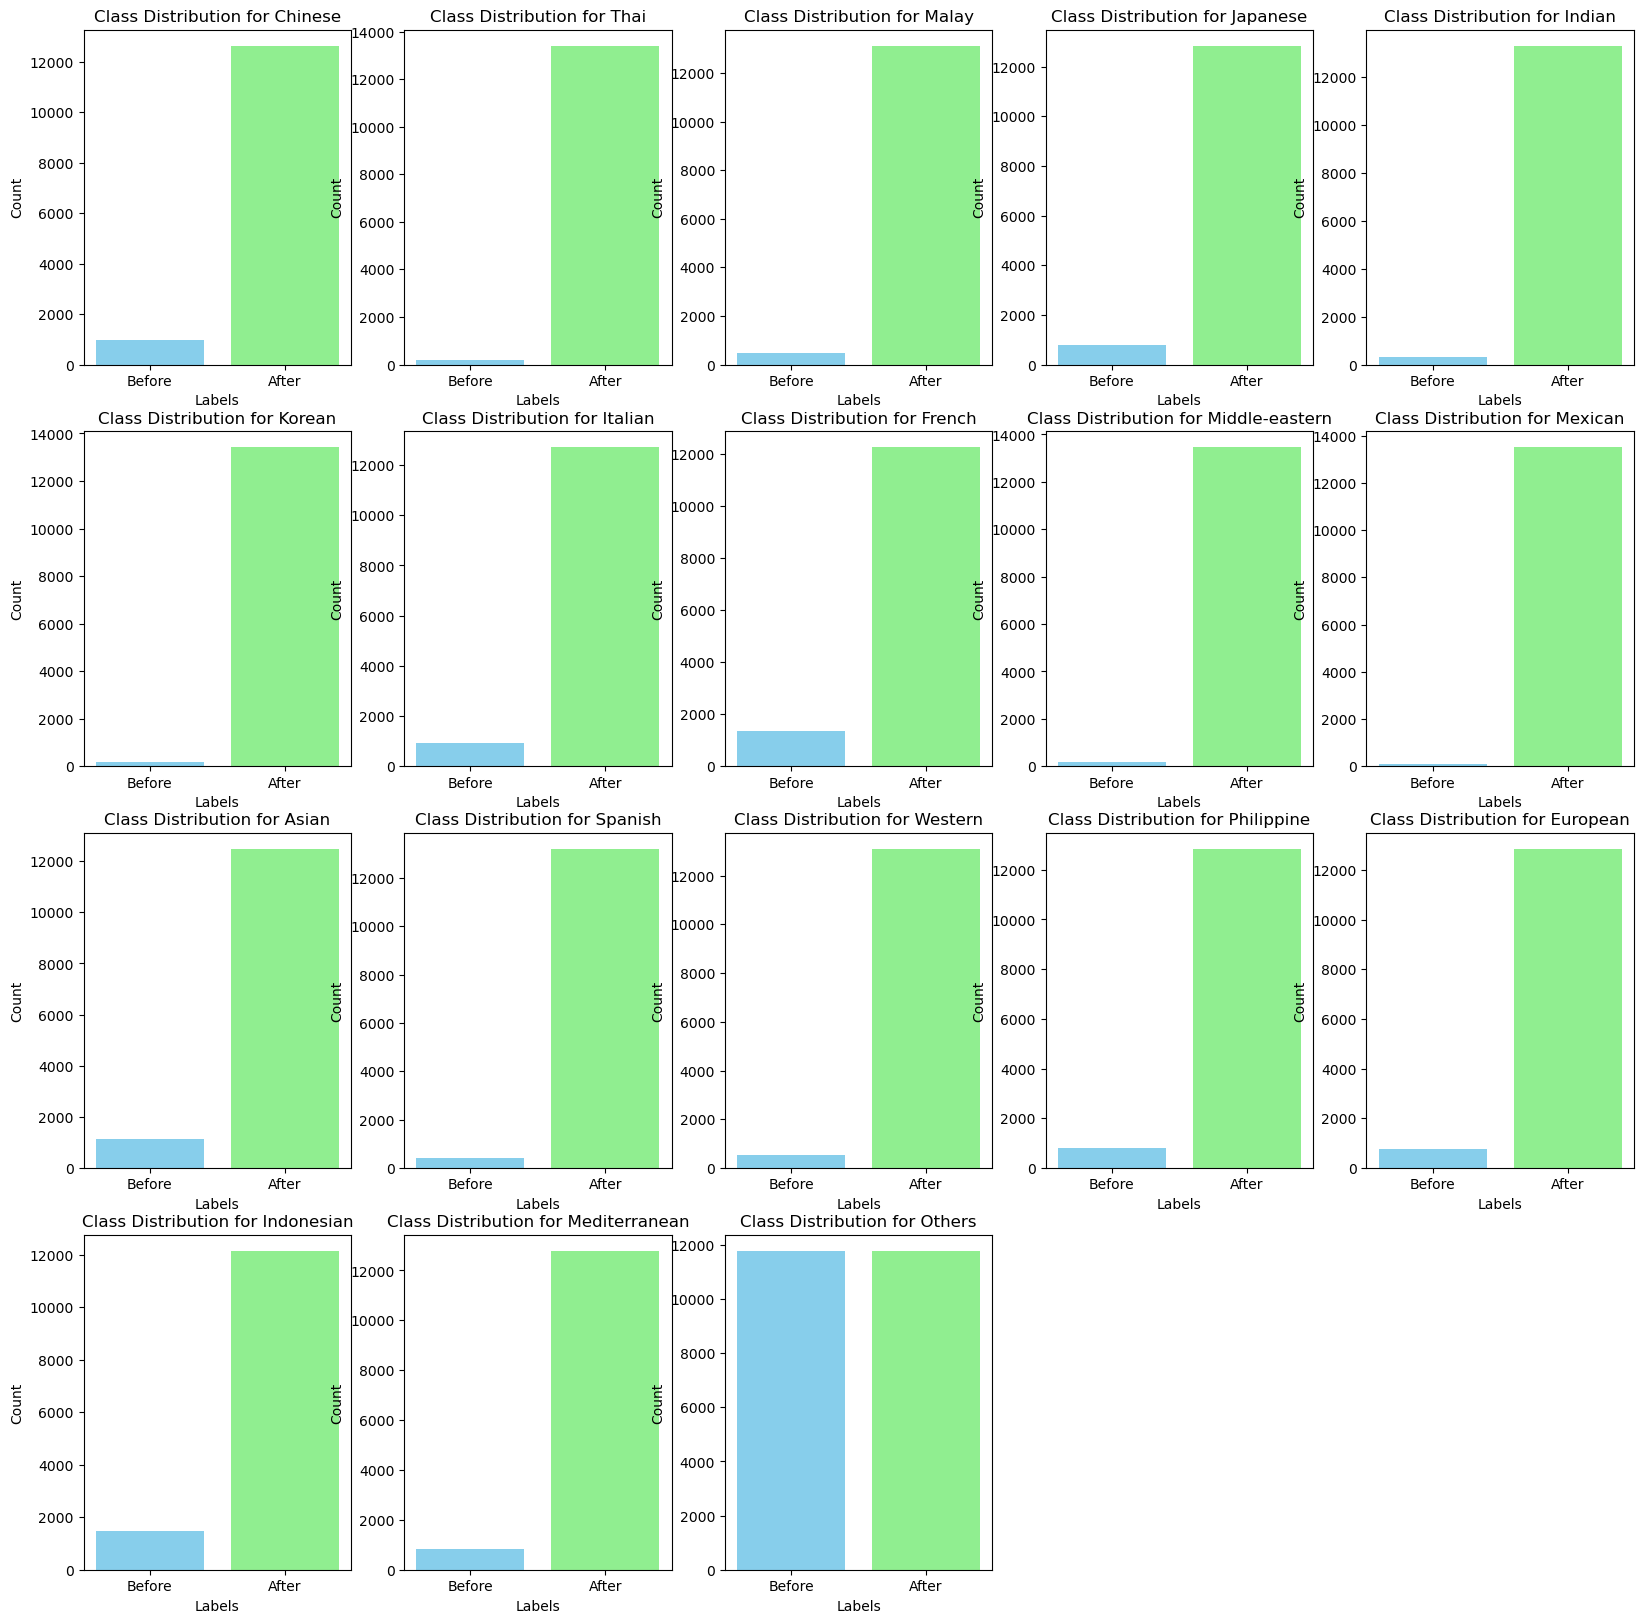

In [19]:
# Plotting the class distribution before and after oversampling for each label
cuisine_names = ['Chinese','Thai','Malay','Japanese','Indian','Korean','Italian','French','Middle-eastern','Mexican','Asian','Spanish','Western','Philippine','European','Indonesian','Mediterranean','Others']


plt.figure(figsize=(20, 20))
num_labels = len(cuisine_names)

for i in range(num_labels):
    plt.subplot(4, 5, i+1)
    plt.bar(['Before', 'After'], [class_counts_before[i], class_counts_after[i]], color=['skyblue', 'lightgreen'])
    plt.title(f'Class Distribution for {cuisine_names[i]}')
    plt.xlabel('Labels')
    plt.ylabel('Count')

#plt.tight_layout()
plt.show()

### Split the dataset to train and test sets

In [48]:
# Data splitting for category data
X_train_list_1, X_test_list_1, category_train_list, category_test_list = [], [], [], []

for X_label_1, category_label in zip(X_resampled_list_1, category_resampled_list):
    X_train_1, X_test_1, category_train, category_test = train_test_split(X_label_1, category_label, test_size=0.2, random_state=42)
    X_train_list_1.append(X_train_1)
    X_test_list_1.append(X_test_1)
    category_train_list.append(category_train)
    category_test_list.append(category_test)

In [22]:
# Data splitting for taste data
X_train_list_2, X_test_list_2, taste_train_list, taste_test_list = [], [], [], []

for X_label_2, taste_label in zip(X_resampled_list_2, taste_resampled_list):
    X_train_2, X_test_2, taste_train, taste_test = train_test_split(X_label_2, taste_label, test_size=0.2, random_state=42)
    X_train_list_2.append(X_train_2)
    X_test_list_2.append(X_test_2)
    taste_train_list.append(taste_train)
    taste_test_list.append(taste_test)

In [20]:
# Data splitting for type data
X_train_list_3, X_test_list_3, type_train_list, type_test_list = [], [], [], []

for X_label_3, type_label in zip(X_resampled_list_3, type_resampled_list):
    X_train_3, X_test_3, type_train, type_test = train_test_split(X_label_3, type_label, test_size=0.2, random_state=42)
    X_train_list_3.append(X_train_3)
    X_test_list_3.append(X_test_3)
    type_train_list.append(type_train)
    type_test_list.append(type_test)

In [38]:
# Data splitting for ambiance data
X_train_list_4, X_test_list_4, ambiance_train_list, ambiance_test_list = [], [], [], []

for X_label_4, ambiance_label in zip(X_resampled_list_4, ambiance_resampled_list):
    X_train_4, X_test_4, ambiance_train, ambiance_test = train_test_split(X_label_4, ambiance_label, test_size=0.2, random_state=42)
    X_train_list_4.append(X_train_4)
    X_test_list_4.append(X_test_4)
    ambiance_train_list.append(ambiance_train)
    ambiance_test_list.append(ambiance_test)

In [20]:
# Data splitting for cuisine data
X_train_list_5, X_test_list_5, cuisine_train_list, cuisine_test_list = [], [], [], []

for X_label_5, cuisine_label in zip(X_resampled_list_5, cuisine_resampled_list):
    X_train_5, X_test_5, cuisine_train, cuisine_test = train_test_split(X_label_5, cuisine_label, test_size=0.2, random_state=42)
    X_train_list_5.append(X_train_5)
    X_test_list_5.append(X_test_5)
    cuisine_train_list.append(cuisine_train)
    cuisine_test_list.append(cuisine_test)

## Model Development

In [21]:
# CNN Model for image recognition for each label
models_list = []

for i in range(num_labels):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification for each label

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    models_list.append(model)

In [ ]:
# Train the model for each label
epochs = 5
batch_size = 32

for i, model in enumerate(models_list):
    print(f"Category training model for label: {category_names[i]}")
    model.fit(X_train_list_1[i], category_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)
    
for i, model in enumerate(models_list):
    print(f"Taste training model for label: {taste_names[i]}")
    model.fit(X_train_list_2[i], taste_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)
    
for i, model in enumerate(models_list):
    print(f"Type training model for label: {type_names[i]}")
    model.fit(X_train_list_3[i], type_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)
    
for i, model in enumerate(models_list):
    print(f"Ambiance training model for label: {ambiance_names[i]}")
    model.fit(X_train_list_4[i], ambiance_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)
    
for i, model in enumerate(models_list):
    print(f"Cuisine training model for label: {cuisine_names[i]}")
    model.fit(X_train_list_5[i], cuisine_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)

### Category Model Training

In [51]:
epochs = 5
batch_size = 32

for i, model in enumerate(models_list):
    print(f"Category training model for label: {category_names[i]}")
    model.fit(X_train_list_1[i], category_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Category training model for label: Food
Epoch 1/5
517/517 [==============================] - 38s 73ms/step - loss: 0.6475 - accuracy: 0.6163 - val_loss: 0.6117 - val_accuracy: 0.6757
Epoch 2/5
517/517 [==============================] - 40s 78ms/step - loss: 0.5609 - accuracy: 0.7138 - val_loss: 0.5246 - val_accuracy: 0.7411
Epoch 3/5
517/517 [==============================] - 41s 80ms/step - loss: 0.4805 - accuracy: 0.7720 - val_loss: 0.4815 - val_accuracy: 0.7744
Epoch 4/5
517/517 [==============================] - 36s 70ms/step - loss: 0.3514 - accuracy: 0.8491 - val_loss: 0.3554 - val_accuracy: 0.8512
Epoch 5/5
517/517 [==============================] - 35s 67ms/step - loss: 0.2121 - accuracy: 0.9177 - val_loss: 0.2477 - val_accuracy: 0.9101
Category training model for label: Dessert
Epoch 1/5
544/544 [==============================] - 37s 67ms/step - loss: 0.6479 - accuracy: 0.6181 - val_loss: 0.6132 - val_accuracy: 0.6577
Epoch 2/5
544/544 [==============================] - 36s 67

In [ ]:
# Evaluate the models on the test set for each label in Category
#test_accuracies = []

#for i, model in enumerate(models_list):
    #print(f"Evaluating model for label: {category_names[i]}")
    #accuracy = model.evaluate(X_test_list_1[i], category_test_list[i])[1]
    #test_accuracies.append(accuracy)

In [55]:
# Calculate and print the overall average accuracy
average_accuracy = np.mean(test_accuracies)
print("Overall Average Accuracy:", average_accuracy)

Overall Average Accuracy: 0.9634620845317841


### Taste Model Training

In [24]:
epochs = 5
batch_size = 32

for i, model in enumerate(models_list):
    print(f"Training model for label in {taste_names}: {i}")
    history = model.fit(X_train_list_2[i], taste_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Training model for label in ['Savory', 'Sweet', 'Sour', 'Spicy', 'Salty', 'Bitter']: 0
Epoch 1/5
407/407 [==============================] - 37s 86ms/step - loss: 0.6911 - accuracy: 0.5289 - val_loss: 0.6924 - val_accuracy: 0.5156
Epoch 2/5
407/407 [==============================] - 34s 83ms/step - loss: 0.6866 - accuracy: 0.5413 - val_loss: 0.6648 - val_accuracy: 0.5938
Epoch 3/5
407/407 [==============================] - 33s 81ms/step - loss: 0.6767 - accuracy: 0.5750 - val_loss: 0.6754 - val_accuracy: 0.5799
Epoch 4/5
407/407 [==============================] - 34s 83ms/step - loss: 0.6694 - accuracy: 0.5832 - val_loss: 0.6656 - val_accuracy: 0.5931
Epoch 5/5
407/407 [==============================] - 34s 83ms/step - loss: 0.6545 - accuracy: 0.6065 - val_loss: 0.6428 - val_accuracy: 0.6408
Training model for label in ['Savory', 'Sweet', 'Sour', 'Spicy', 'Salty', 'Bitter']: 1
Epoch 1/5
446/446 [==============================] - 40s 87ms/step - loss: 0.6799 - accuracy: 0.5571 - val_loss

In [25]:
# Evaluate the models on the test set for each label
test_accuracies_taste = []

for i, model in enumerate(models_list):
    print(f"Evaluating model for label: {taste_names[i]}")
    accuracy = model.evaluate(X_test_list_2[i], taste_test_list[i])[1]
    test_accuracies_taste.append(accuracy)

Evaluating model for label: Savory
113/113 [==============================] - 3s 22ms/step - loss: 0.6476 - accuracy: 0.6113
Evaluating model for label: Sweet
124/124 [==============================] - 3s 21ms/step - loss: 0.6160 - accuracy: 0.6728
Evaluating model for label: Sour
169/169 [==============================] - 4s 21ms/step - loss: 0.0053 - accuracy: 0.9981
Evaluating model for label: Spicy
158/158 [==============================] - 4s 24ms/step - loss: 0.1311 - accuracy: 0.9647
Evaluating model for label: Salty
247/247 [==============================] - 5s 20ms/step - loss: -27960898521923584.0000 - accuracy: 0.3305
Evaluating model for label: Bitter
170/170 [==============================] - 3s 20ms/step - loss: 0.0017 - accuracy: 0.9994


In [26]:
# Calculate and print the overall average accuracy
average_accuracy_taste = np.mean(test_accuracies_taste)
print("Overall Average Accuracy:", average_accuracy_taste)

Overall Average Accuracy: 0.7628291497627894


### Type Model Training

In [22]:
# Train the model for each label
epochs = 5
batch_size = 32
    
for i, model in enumerate(models_list):
    print(f"Type training model for label: {type_names[i]}")
    model.fit(X_train_list_3[i], type_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Type training model for label: Seafood
Epoch 1/5
554/554 [==============================] - 44s 78ms/step - loss: 0.6849 - accuracy: 0.5601 - val_loss: 0.6787 - val_accuracy: 0.5747
Epoch 2/5
554/554 [==============================] - 40s 72ms/step - loss: 0.6464 - accuracy: 0.6157 - val_loss: 0.6019 - val_accuracy: 0.6773
Epoch 3/5
554/554 [==============================] - 40s 72ms/step - loss: 0.4536 - accuracy: 0.7842 - val_loss: 0.3444 - val_accuracy: 0.8608
Epoch 4/5
554/554 [==============================] - 40s 72ms/step - loss: 0.1740 - accuracy: 0.9360 - val_loss: 0.1978 - val_accuracy: 0.9278
Epoch 5/5
554/554 [==============================] - 40s 73ms/step - loss: 0.0517 - accuracy: 0.9850 - val_loss: 0.0923 - val_accuracy: 0.9731
Type training model for label: Gluten-free
Epoch 1/5
590/590 [==============================] - 44s 74ms/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6655 - val_accuracy: 0.5990
Epoch 2/5
590/590 [==============================] - 43s 72m

In [23]:
# Evaluate the models on the test set for each label
test_accuracies_type = []

for i, model in enumerate(models_list):
    print(f"Evaluating model for label: {type_names[i]}")
    accuracy = model.evaluate(X_test_list_3[i], type_test_list[i])[1]
    test_accuracies_type.append(accuracy)

Evaluating model for label: Seafood
154/154 [==============================] - 3s 20ms/step - loss: 0.1079 - accuracy: 0.9709
Evaluating model for label: Gluten-free
164/164 [==============================] - 4s 23ms/step - loss: 0.0146 - accuracy: 0.9952
Evaluating model for label: Others
148/148 [==============================] - 4s 25ms/step - loss: 0.3835 - accuracy: 0.8356


In [24]:
# Calculate and print the overall average accuracy
average_accuracy_type = np.mean(test_accuracies_type)
print("Overall Average Accuracy:", average_accuracy_type)

Overall Average Accuracy: 0.9339166879653931


### Ambiance Model Training

In [43]:
# Train the model for each label
epochs = 10
batch_size = 32
    
for i, model in enumerate(models_list):
    print(f"Ambiance training model for label: {ambiance_names[i]}")
    model.fit(X_train_list_4[i], ambiance_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Ambiance training model for label: Casual
Epoch 1/10
416/416 [==============================] - 6s 14ms/step - loss: 0.6219 - accuracy: 0.6471 - val_loss: 0.6433 - val_accuracy: 0.6310
Epoch 2/10
416/416 [==============================] - 6s 15ms/step - loss: 0.5852 - accuracy: 0.6841 - val_loss: 0.6359 - val_accuracy: 0.6473
Epoch 3/10
416/416 [==============================] - 7s 16ms/step - loss: 0.5333 - accuracy: 0.7322 - val_loss: 0.6992 - val_accuracy: 0.6202
Epoch 4/10
416/416 [==============================] - 7s 16ms/step - loss: 0.4632 - accuracy: 0.7784 - val_loss: 0.6127 - val_accuracy: 0.7014
Epoch 5/10
416/416 [==============================] - 6s 15ms/step - loss: 0.3855 - accuracy: 0.8278 - val_loss: 0.6242 - val_accuracy: 0.7116
Epoch 6/10
416/416 [==============================] - 6s 15ms/step - loss: 0.3063 - accuracy: 0.8689 - val_loss: 0.7153 - val_accuracy: 0.7035
Epoch 7/10
416/416 [==============================] - 6s 15ms/step - loss: 0.2404 - accuracy: 0.9022

In [44]:
# Evaluate the models on the test set for each label
test_accuracies_ambiance = []

for i, model in enumerate(models_list):
    print(f"Evaluating model for label: {ambiance_names[i]}")
    accuracy = model.evaluate(X_test_list_4[i], ambiance_test_list[i])[1]
    test_accuracies_ambiance.append(accuracy)

Evaluating model for label: Casual
116/116 [==============================] - 1s 6ms/step - loss: 1.0590 - accuracy: 0.7369
Evaluating model for label: Cafe
221/221 [==============================] - 1s 6ms/step - loss: -105543289381322752.0000 - accuracy: 0.3309
Evaluating model for label: Fine-dining
154/154 [==============================] - 1s 6ms/step - loss: 0.1825 - accuracy: 0.9597
Evaluating model for label: Pubs-&-bars
237/237 [==============================] - 1s 6ms/step - loss: -142890667129962496.0000 - accuracy: 0.3313
Evaluating model for label: Coffee-shop
170/170 [==============================] - 1s 6ms/step - loss: 8.4774e-05 - accuracy: 1.0000
Evaluating model for label: Dessert-shop
169/169 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 0.9989


In [45]:
# Calculate and print the overall average accuracy
average_accuracy_ambiance = np.mean(test_accuracies_ambiance)
print("Overall Average Accuracy:", average_accuracy_ambiance)

Overall Average Accuracy: 0.7262858053048452


### Cuisine Model Training

In [22]:
# Train the model for each label
epochs = 5
batch_size = 32
    
for i, model in enumerate(models_list):
    print(f"Cuisine training model for label: {cuisine_names[i]}")
    model.fit(X_train_list_5[i], cuisine_train_list[i], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Cuisine training model for label: Chinese
Epoch 1/5
569/569 [==============================] - 11s 17ms/step - loss: 0.6786 - accuracy: 0.5632 - val_loss: 0.6539 - val_accuracy: 0.6105
Epoch 2/5
569/569 [==============================] - 10s 17ms/step - loss: 0.5824 - accuracy: 0.6844 - val_loss: 0.5309 - val_accuracy: 0.7118
Epoch 3/5
569/569 [==============================] - 9s 16ms/step - loss: 0.3347 - accuracy: 0.8542 - val_loss: 0.3304 - val_accuracy: 0.8566
Epoch 4/5
569/569 [==============================] - 9s 16ms/step - loss: 0.1479 - accuracy: 0.9456 - val_loss: 0.1598 - val_accuracy: 0.9372
Epoch 5/5
569/569 [==============================] - 9s 16ms/step - loss: 0.0735 - accuracy: 0.9758 - val_loss: 0.1697 - val_accuracy: 0.9466
Cuisine training model for label: Thai
Epoch 1/5
604/604 [==============================] - 11s 17ms/step - loss: 0.3252 - accuracy: 0.8354 - val_loss: 0.0354 - val_accuracy: 0.9869
Epoch 2/5
604/604 [==============================] - 10s 17ms/st

562/562 [==============================] - 9s 17ms/step - loss: 0.1029 - accuracy: 0.9654 - val_loss: 0.2257 - val_accuracy: 0.9213
Cuisine training model for label: Spanish
Epoch 1/5
594/594 [==============================] - 12s 18ms/step - loss: 0.5984 - accuracy: 0.6536 - val_loss: 0.3393 - val_accuracy: 0.8579
Epoch 2/5
594/594 [==============================] - 10s 17ms/step - loss: 0.1333 - accuracy: 0.9544 - val_loss: 0.0849 - val_accuracy: 0.9739
Epoch 3/5
594/594 [==============================] - 10s 17ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0412 - val_accuracy: 0.9905
Epoch 4/5
594/594 [==============================] - 10s 17ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0531 - val_accuracy: 0.9848
Epoch 5/5
594/594 [==============================] - 10s 17ms/step - loss: 0.0248 - accuracy: 0.9912 - val_loss: 0.0378 - val_accuracy: 0.9919
Cuisine training model for label: Western
Epoch 1/5
589/589 [==============================] - 11s 17ms/step - 

In [23]:
# Evaluate the models on the test set for each label
test_accuracies_cuisine = []

for i, model in enumerate(models_list):
    print(f"Evaluating model for label: {cuisine_names[i]}")
    accuracy = model.evaluate(X_test_list_5[i], cuisine_test_list[i])[1]
    test_accuracies_cuisine.append(accuracy)

Evaluating model for label: Chinese
158/158 [==============================] - 1s 6ms/step - loss: 0.1903 - accuracy: 0.9450
Evaluating model for label: Thai
168/168 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.9978
Evaluating model for label: Malay
165/165 [==============================] - 1s 6ms/step - loss: 0.0824 - accuracy: 0.9773
Evaluating model for label: Japanese
161/161 [==============================] - 1s 6ms/step - loss: 0.1332 - accuracy: 0.9642
Evaluating model for label: Indian
167/167 [==============================] - 1s 6ms/step - loss: 0.0689 - accuracy: 0.9799
Evaluating model for label: Korean
168/168 [==============================] - 1s 6ms/step - loss: 0.0104 - accuracy: 0.9968
Evaluating model for label: Italian
159/159 [==============================] - 1s 6ms/step - loss: 0.1409 - accuracy: 0.9565
Evaluating model for label: French
154/154 [==============================] - 1s 6ms/step - loss: 0.2491 - accuracy: 0.9029
Evaluat

In [24]:
# Calculate and print the overall average accuracy
average_accuracy_cuisine = np.mean(test_accuracies_cuisine)
print("Overall Average Accuracy:", average_accuracy_cuisine)

Overall Average Accuracy: 0.9520540138085684


# Model Testing

In [78]:
import cv2

# Load and preprocess the actual image
image_path = 'Downloads/Crave_multi-label_classification/Malaysia/R206_1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (img_width, img_height))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)

In [79]:
# Making predictions on the image
predictions = model.predict(image)

1/1 [==============================] - 0s 38ms/step


In [80]:
# Extract the predicted outputs
category_pred = np.argmax(predictions[0])
taste_pred = np.argmax(predictions[1])
type_pred = np.argmax(predictions[2])
ambiance_pred = np.argmax(predictions[3])
cuisine_pred = np.argmax(predictions[4])

In [81]:
# Mapping the predicted class indices to their respective labels
category_classes = ['Food','Dessert','Drink','Pastries']
taste_classes = ['Savory','Sweet','Sour','Spicy','Salty','Bitter']
type_classes = ['Seafood','Gluten-free']
ambiance_classes = ['Casual','Cafe','Fine-dining','Pubs-&-bars','Coffee-shop','Dessert-shop']
cuisine_classes = ['Chinese','Thai','Western','Malay','Japanese','Indian','Korean','Italian','French','Vietnamese','Middle-eastern','Mexican','Singapore','Asian','Spanish','American','Turkish','Philippine','German','Pakistani','European','Indonesian','Australian','Mediterranean']

In [82]:
# Map the predicted class indices to their respective labels
category_label = category_classes[category_pred]
taste_label = taste_classes[taste_pred]
type_label = type_classes[type_pred]
ambiance_label = ambiance_classes[ambiance_pred]
cuisine_label = cuisine_classes[cuisine_pred]

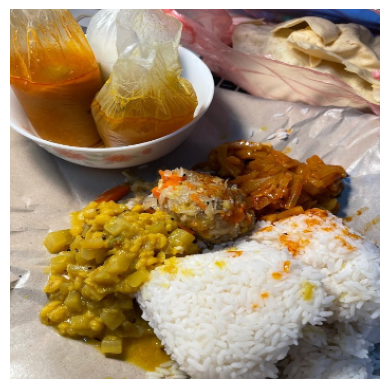

Category: Food
Taste: Savory
Type: Seafood
Ambiance: Casual
Cuisine: Pakistani


In [83]:
# Display the image
plt.imshow(image[0])
plt.axis('off')
plt.show()

# Print the predicted labels
print('Category:', category_label)
print('Taste:', taste_label)
print('Type:', type_label)
print('Ambiance:', ambiance_label)
print('Cuisine:', cuisine_label)